In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import matplotlib.dates as mdates
from pycoingecko import CoinGeckoAPI
import requests
import matplotlib.ticker as ticker

In [101]:
#Cargamos la data
tx = pd.read_csv('csv/gq_all_tx.csv')

In [102]:
walletsF = tx['from'].value_counts()
walletsF = walletsF.to_frame(name='from')
walletsF.reset_index(inplace=True)
walletsF.rename(columns={'index': 'wallet'}, inplace=True)
walletsF.head()


,wallet,from
0,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029
1,0xd152f549545093347a162dce210e7293f1452150,4068
2,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625
3,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,1755
4,0xe1195faa3e0070cf1444685865e5a0775ad5124c,1687


In [103]:
walletsT = tx['to'].value_counts()
walletsT = walletsT.to_frame(name='to')
walletsT.reset_index(inplace=True)
walletsT.rename(columns={'index': 'wallet'}, inplace=True)
walletsT.head()

,wallet,to
0,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,13309
1,0xb4c88543bd95617fb61f3d031b8e8e19af33201e,1642
2,0xb88d09175676913d69924acac17ec69037f1551e,1640
3,0xc590175e458b83680867afd273527ff58f74c02b,1519
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,1492


In [104]:
wallets = walletsF.merge(walletsT, on='wallet', how='outer')
wallets.fillna(0, inplace=True)
wallets = wallets.assign(total=wallets['from'] + wallets['to'])
wallets = wallets.rename(columns={'from': 'send-sell-txs', 'to': 'recibe-buy-txs'})
wallets.head()

,wallet,send-sell-txs,recibe-buy-txs,total
0,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0
1,0xd152f549545093347a162dce210e7293f1452150,4068.0,32.0,4100.0
2,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0
3,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,1755.0,826.0,2581.0
4,0xe1195faa3e0070cf1444685865e5a0775ad5124c,1687.0,5.0,1692.0


In [105]:
print(F'Han interactuado con el contrato un total de {wallets.shape[0]} wallets')

Han interactuado con el contrato un total de 15569 wallets


In [106]:
wallets_200 = wallets[:200]
wallets_200

,wallet,send-sell-txs,recibe-buy-txs,total
0,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0
1,0xd152f549545093347a162dce210e7293f1452150,4068.0,32.0,4100.0
2,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0
3,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,1755.0,826.0,2581.0
4,0xe1195faa3e0070cf1444685865e5a0775ad5124c,1687.0,5.0,1692.0
...,...,...,...,...
195,0xd2e4f773c76c474fb7864efbaec632e5811fea44,59.0,68.0,127.0
196,0x171c2a0edd40c01053aafb2e16ecd9b06ad898ea,59.0,45.0,104.0
197,0x37f79c1ae005b8b08c702868e16b3eacef52d9a6,59.0,66.0,125.0
198,0x1c9e3fff5613af087adcf2f6aed04f97a5ef0079,58.0,44.0,102.0


In [107]:
# Address = token contract
apikey = "GKDPH6RRX5YSH1TYPMNHNVKGMB6I9V3I8T"
address = "0xF700D4c708C2be1463E355F337603183D20E0808"

def get_balance(address, wallet):
    url = "https://api.bscscan.com/api"
    params = {
    "module": "account",
    "action": "tokenbalance",
    "contractaddress": address,
    "address": wallet,
    "tag": "latest",
    "apikey": apikey,
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        balance = response.json()["result"]
        return balance
    else:
        return "Error en la solicitud"

In [108]:
for row_indexer, row in wallets_200.iterrows():
    wallet = row['wallet']
    wallet_balance = int(get_balance(address, wallet)) / 1000000000000000000
    wallets_200.loc[row_indexer, 'balance'] = wallet_balance
    wallets_200

C:\Users\progr\AppData\Local\Temp\ipykernel_15732\4253969958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wallets_200.loc[row_indexer, 'balance'] = wallet_balance


In [109]:
wallets_200.sort_values(by='balance', ascending=False, inplace=True)
wallets_200.reset_index(drop=True, inplace=True)
wallets_200

C:\Users\progr\AppData\Local\Temp\ipykernel_15732\3122151130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wallets_200.sort_values(by='balance', ascending=False, inplace=True)


,wallet,send-sell-txs,recibe-buy-txs,total,balance
0,0xb88d09175676913d69924acac17ec69037f1551e,1265.0,1640.0,2905.0,1.210061e+09
1,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0,1.235470e+08
2,0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83,883.0,1223.0,2106.0,8.847007e+07
3,0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf,246.0,587.0,833.0,7.373475e+07
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0,6.619476e+07
...,...,...,...,...,...
195,0x4c42984ad40f5c327c2b3dd9008000aa6544a41d,288.0,288.0,576.0,0.000000e+00
196,0x10e4f143e4b01941e2c7c53ade293419def55083,107.0,107.0,214.0,0.000000e+00
197,0x9c4350f527ff7f96b650ee894ae9103bdfec0432,262.0,62.0,324.0,0.000000e+00
198,0xe7b09d924b0dba89d812c0bcc767aa306137ee50,248.0,237.0,485.0,0.000000e+00


In [110]:
pcs_address = "0x72121d60b0e2F01c0FB7FE32cA24021b42165A40"
venture_disperser = "0xd152f549545093347a162dce210e7293f1452150"
gq_stake = "0xdf5c4c1b98a4d045573ab2005d77e87daa58c853"
mexccom = "0x4982085c9e2f89f2ecb8131eca71afad896e89cb"
venture_claim = "0xe1195faa3e0070cf1444685865e5a0775ad5124c"
venture_claim2 = "0x5ad3cc14c53f898a79f69e54a00c023de24e007f"
venture_claim3 = "0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301"
biswap_address = "0xb4c88543bd95617fb61f3d031b8e8e19af33201e"
gateio = "0x0d0707963952f2fba59dd06f2b425ace40b492fe"
gq_stake2 = "0xb88d09175676913d69924acac17ec69037f1551e"
exange_proxy = "0xc590175e458b83680867afd273527ff58f74c02b"
venture_claim4 = "0x02d51353a4d8d115350af5f60917570c3faf7a83"
venture_claim5 = "0xb6bd6bfc70723f385159f5be9def1a7bff4e175c"
galactic_reserve = "0x8DC7009B41341C04a287258d0951f4dd8008FC82"
disperventure_disperser2 = "0x060479360f3797412a921e219904c3bcfe0eba4b"
cake_farm = "0x983a241bfe910fcfa3e70744aa21aae5f45861f0"
venture = "0x2794a45b10113d2bd7ed28af677077c75bb308d0"
venture_claim6 = "0xf73bd04e48f48238449081a0c328151e9674f703"
ape_farm = "0xa6b0f91e3eda93db4266416cc43ea4e35149d0df"
huobi = "0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83"
pcs_pair = "0x0c9064761eac5972f53d199fdd3bc6391707c5a2"
galactic_reserve2 = "0x8fb4f01fc37fc3e2ba1797cbfd8502020572b3a3"
paraswap = "0xdef171fe48cf0115b1d80b88dc8eab59176fee57"
agregator_4inch = "0x1111111254fb6c44bac0bed2854e76f90643097d"
pcs_swap = "0xc6665d98efd81f47b03801187eb46cbc63f328b0"
swap = "0xdb6f1920a889355780af7570773609bd8cb1f498"
gq_claim = "0x739e6e290f9aa6ef3a929950aa47795b1d187229"
swap2 = "0xb7499a92fc36e9053a4324affae59d333635d9c3"
ape_pair = "0xcc3a3bc1d76df321f94716e88224638c439267aa"
pcs_pair = "0x06a2355fe6f2e93f3177be26df5926211e9dd462"
venture2 = "0xab50b28447107b40329eb62eaf8efbf8f80c8af4"
bot = "0x0303d52057efef51eeea9ad36bc788df827f183d"
bot2 = "0xb9b9161c6440353d30e06f6a3f93cd43bd1e3907"

In [134]:

gq_saved_wallets = {
        'wallet':[
                '0x72121d60b0e2F01c0FB7FE32cA24021b42165A40', '0xd152f549545093347a162dce210e7293f1452150',
                '0xdf5c4c1b98a4d045573ab2005d77e87daa58c853', '0x4982085c9e2f89f2ecb8131eca71afad896e89cb',
                '0xe1195faa3e0070cf1444685865e5a0775ad5124c', '0x5ad3cc14c53f898a79f69e54a00c023de24e007f',
                '0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301', '0xb4c88543bd95617fb61f3d031b8e8e19af33201e',
                '0x0d0707963952f2fba59dd06f2b425ace40b492fe', '0xb88d09175676913d69924acac17ec69037f1551e',
                '0xc590175e458b83680867afd273527ff58f74c02b', '0x02d51353a4d8d115350af5f60917570c3faf7a83',
                '0xb6bd6bfc70723f385159f5be9def1a7bff4e175c', '0x8DC7009B41341C04a287258d0951f4dd8008FC82',
                '0x060479360f3797412a921e219904c3bcfe0eba4b', '0x983a241bfe910fcfa3e70744aa21aae5f45861f0',
                '0x2794a45b10113d2bd7ed28af677077c75bb308d0', '0xf73bd04e48f48238449081a0c328151e9674f703',
                '0xa6b0f91e3eda93db4266416cc43ea4e35149d0df', '0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83',
                '0x0c9064761eac5972f53d199fdd3bc6391707c5a2', '0x8fb4f01fc37fc3e2ba1797cbfd8502020572b3a3',
                '0xdef171fe48cf0115b1d80b88dc8eab59176fee57', '0x1111111254fb6c44bac0bed2854e76f90643097d',
                '0xc6665d98efd81f47b03801187eb46cbc63f328b0', '0xdb6f1920a889355780af7570773609bd8cb1f498',
                '0x739e6e290f9aa6ef3a929950aa47795b1d187229', '0xb7499a92fc36e9053a4324affae59d333635d9c3',
                '0xcc3a3bc1d76df321f94716e88224638c439267aa', '0x06a2355fe6f2e93f3177be26df5926211e9dd462',
                '0xab50b28447107b40329eb62eaf8efbf8f80c8af4', '0x0303d52057efef51eeea9ad36bc788df827f183d',
                '0xb9b9161c6440353d30e06f6a3f93cd43bd1e3907', '0xB65f061f3d34FB2C4d37f1017F8736435686cf51',
                '0x5ac19e17ffc41d091131d62628d0e94796949262', '0x328130164d0f2b9d7a52edc73b3632e713ff0ec6',
                '0xAfD5edE8f2A5D712537d941D0EC20778bDe2024f', '0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf',
                ],
        'name': [
                'pcs_address', 'venture_disperser', 'gq_stake', 'mexccom', 'venture_claim', 'venture_claim2',
                'venture_claim3', 'biswap_address', 'gateio', 'gq_stake2', 'exange_proxy', 'venture_claim4',
                'venture_claim5', 'galactic_reserve', 'disperventure_disperser2', 'cake_farm', 'venture',
                'venture_claim6', 'ape_farm', 'huobi', 'pcs_pair', 'galactic_reserve2', 'paraswap',
                'agregator_4inch', 'pcs_swap', 'swap', 'gq_claim', 'swap2', 'ape_pair', 'pcs_pair',
                'venture2', 'bot', 'bot2', 'galactic_reserve3', 'venture_claim67', 'bitmart', 
                'galactic_reserve3', 'staking_vote',
                ]
                }

saved_wallets = pd.DataFrame(gq_saved_wallets)
saved_wallets['name'] = saved_wallets['name'].astype(str)

saved_wallets['type'] = 'unknown'
exanges = ['huobi', 'gateio', 'mexccom', 'bitmart',]
liquidity_pool = ['pcs', 'ape', 'mexccom', 'bitmart', 'biswap']

for index, row in saved_wallets.iterrows():
    if 'stak' in row['name']:
        saved_wallets.at[index, 'type'] = 'stake'
    elif 'venture' in row['name'] or 'claim' in row['name'] or 'disperser' in row['name']:
        saved_wallets.at[index, 'type'] = 'venture'
    elif 'reserve' in row['name']:
        saved_wallets.at[index, 'type'] = 'galactic_reserve'
    elif any(exange in row['name'] for exange in exanges):
        saved_wallets.at[index, 'type'] = 'exange'
    elif any(lp in row['name'] for lp in liquidity_pool):
        saved_wallets.at[index, 'type'] = 'liquidity_pool'
        
saved_wallets.to_csv("csv/gq_saved_wallets.csv", index=False)

In [112]:
gq_saved_wallets = pd.DataFrame(gq_saved_wallets)
gq_saved_wallets

,wallet,name
0,0x72121d60b0e2F01c0FB7FE32cA24021b42165A40,pcs_address
1,0xd152f549545093347a162dce210e7293f1452150,venture_disperser
2,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,gq_stake
3,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,mexccom
4,0xe1195faa3e0070cf1444685865e5a0775ad5124c,venture_claim
5,0x5ad3cc14c53f898a79f69e54a00c023de24e007f,venture_claim2
6,0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301,venture_claim3
7,0xb4c88543bd95617fb61f3d031b8e8e19af33201e,biswap_address
8,0x0d0707963952f2fba59dd06f2b425ace40b492fe,gateio
9,0xb88d09175676913d69924acac17ec69037f1551e,gq_stake2


In [113]:
wallets_20 = wallets_200.head(20)
wallets_20

,wallet,send-sell-txs,recibe-buy-txs,total,balance
0,0xb88d09175676913d69924acac17ec69037f1551e,1265.0,1640.0,2905.0,1.210061e+09
1,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0,1.235470e+08
2,0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83,883.0,1223.0,2106.0,8.847007e+07
3,0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf,246.0,587.0,833.0,7.373475e+07
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0,6.619476e+07
5,0x0d0707963952f2fba59dd06f2b425ace40b492fe,1414.0,623.0,2037.0,3.967779e+07
6,0xcc3a3bc1d76df321f94716e88224638c439267aa,608.0,522.0,1130.0,2.617231e+07
7,0x060479360f3797412a921e219904c3bcfe0eba4b,1096.0,10.0,1106.0,2.425689e+07
8,0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301,1632.0,1.0,1633.0,2.301351e+07
9,0x739e6e290f9aa6ef3a929950aa47795b1d187229,614.0,0.0,614.0,2.032573e+07


In [114]:

token_price = CoinGeckoAPI().get_price(ids='outer-ring', vs_currencies='usd')
token_price

{'outer-ring': {'usd': 0.00476967}}

In [115]:
token_price["outer-ring"]["usd"]

0.00476967

In [116]:
for row_indexer, row in wallets_20.iterrows():
    wallet_balance_usd = int(row['balance']) * token_price["outer-ring"]["usd"]
    wallets_20.loc[row_indexer, 'balance_usd'] = wallet_balance_usd

wallets_20

C:\Users\progr\AppData\Local\Temp\ipykernel_15732\765929591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wallets_20.loc[row_indexer, 'balance_usd'] = wallet_balance_usd


,wallet,send-sell-txs,recibe-buy-txs,total,balance,balance_usd
0,0xb88d09175676913d69924acac17ec69037f1551e,1265.0,1640.0,2905.0,1.210061e+09,5.771592e+06
1,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0,1.235470e+08,5.892786e+05
2,0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83,883.0,1223.0,2106.0,8.847007e+07,4.219730e+05
3,0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf,246.0,587.0,833.0,7.373475e+07,3.516904e+05
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0,6.619476e+07,3.157271e+05
5,0x0d0707963952f2fba59dd06f2b425ace40b492fe,1414.0,623.0,2037.0,3.967779e+07,1.892500e+05
6,0xcc3a3bc1d76df321f94716e88224638c439267aa,608.0,522.0,1130.0,2.617231e+07,1.248333e+05
7,0x060479360f3797412a921e219904c3bcfe0eba4b,1096.0,10.0,1106.0,2.425689e+07,1.156973e+05
8,0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301,1632.0,1.0,1633.0,2.301351e+07,1.097668e+05
9,0x739e6e290f9aa6ef3a929950aa47795b1d187229,614.0,0.0,614.0,2.032573e+07,9.694703e+04


In [117]:
wallets_20['wallet'] = wallets_20['wallet'].str.lower()
gq_saved_wallets['wallet'] = gq_saved_wallets['wallet'].str.lower()

wallets_20 = pd.merge(wallets_20, gq_saved_wallets, on='wallet', how='left', suffixes=(wallets_20))
wallets_20

C:\Users\progr\AppData\Local\Temp\ipykernel_15732\2760324077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wallets_20['wallet'] = wallets_20['wallet'].str.lower()


,wallet,send-sell-txs,recibe-buy-txs,total,balance,balance_usd,name
0,0xb88d09175676913d69924acac17ec69037f1551e,1265.0,1640.0,2905.0,1.210061e+09,5.771592e+06,gq_stake2
1,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0,1.235470e+08,5.892786e+05,pcs_address
2,0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83,883.0,1223.0,2106.0,8.847007e+07,4.219730e+05,huobi
3,0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf,246.0,587.0,833.0,7.373475e+07,3.516904e+05,staking_vote
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0,6.619476e+07,3.157271e+05,gq_stake
5,0x0d0707963952f2fba59dd06f2b425ace40b492fe,1414.0,623.0,2037.0,3.967779e+07,1.892500e+05,gateio
6,0xcc3a3bc1d76df321f94716e88224638c439267aa,608.0,522.0,1130.0,2.617231e+07,1.248333e+05,ape_pair
7,0x060479360f3797412a921e219904c3bcfe0eba4b,1096.0,10.0,1106.0,2.425689e+07,1.156973e+05,disperventure_disperser2
8,0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301,1632.0,1.0,1633.0,2.301351e+07,1.097668e+05,venture_claim3
9,0x739e6e290f9aa6ef3a929950aa47795b1d187229,614.0,0.0,614.0,2.032573e+07,9.694703e+04,gq_claim


In [118]:
wallets_20['name'] = wallets_20['name'].astype(str)

wallets_20['type'] = 'unknown'
exanges = ['huobi', 'gateio', 'mexccom', 'bitmart',]
liquidity_pool = ['pcs', 'ape', 'mexccom', 'bitmart', 'biswap']

for index, row in wallets_20.iterrows():
    if 'stak' in row['name']:
        wallets_20.at[index, 'type'] = 'stake'
    elif 'venture' in row['name'] or 'claim' in row['name'] or 'disperser' in row['name']:
        wallets_20.at[index, 'type'] = 'venture'
    elif 'reserve' in row['name']:
        wallets_20.at[index, 'type'] = 'galactic_reserve'
    elif any(exange in row['name'] for exange in exanges):
        wallets_20.at[index, 'type'] = 'exange'
    elif any(lp in row['name'] for lp in liquidity_pool):
        wallets_20.at[index, 'type'] = 'liquidity_pool'

In [119]:
wallets_20 = wallets_20.dropna()
wallets_20.to_csv("csv/whales.csv", index=False)
wallets_20

,wallet,send-sell-txs,recibe-buy-txs,total,balance,balance_usd,name,type
0,0xb88d09175676913d69924acac17ec69037f1551e,1265.0,1640.0,2905.0,1.210061e+09,5.771592e+06,gq_stake2,stake
1,0x72121d60b0e2f01c0fb7fe32ca24021b42165a40,18029.0,13309.0,31338.0,1.235470e+08,5.892786e+05,pcs_address,liquidity_pool
2,0xefdca55e4bce6c1d535cb2d0687b5567eef2ae83,883.0,1223.0,2106.0,8.847007e+07,4.219730e+05,huobi,exange
3,0x98f66c1b103e46f855f1ad17c5c52286d5fb7cdf,246.0,587.0,833.0,7.373475e+07,3.516904e+05,staking_vote,stake
4,0xdf5c4c1b98a4d045573ab2005d77e87daa58c853,2625.0,1492.0,4117.0,6.619476e+07,3.157271e+05,gq_stake,stake
5,0x0d0707963952f2fba59dd06f2b425ace40b492fe,1414.0,623.0,2037.0,3.967779e+07,1.892500e+05,gateio,exange
6,0xcc3a3bc1d76df321f94716e88224638c439267aa,608.0,522.0,1130.0,2.617231e+07,1.248333e+05,ape_pair,liquidity_pool
7,0x060479360f3797412a921e219904c3bcfe0eba4b,1096.0,10.0,1106.0,2.425689e+07,1.156973e+05,disperventure_disperser2,venture
8,0x9ef956da6787aeaa8ddc61cd1dddbcd4ea901301,1632.0,1.0,1633.0,2.301351e+07,1.097668e+05,venture_claim3,venture
9,0x739e6e290f9aa6ef3a929950aa47795b1d187229,614.0,0.0,614.0,2.032573e+07,9.694703e+04,gq_claim,venture


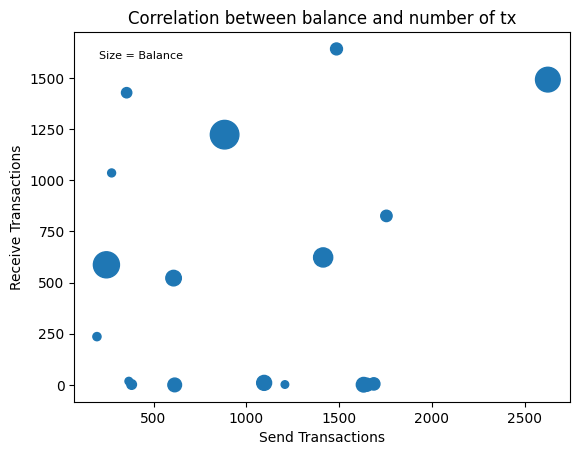

In [120]:
# Outliers for scatter
wallets_20_scatter = wallets_20[(wallets_20['wallet'] != '0x72121d60b0e2f01c0fb7fe32ca24021b42165a40') & (wallets_20['wallet'] != '0xb88d09175676913d69924acac17ec69037f1551e')]

# Replace wallets_20 with your actual data
x = wallets_20_scatter['send-sell-txs']
y = wallets_20_scatter['recibe-buy-txs']
sizes = wallets_20_scatter['balance_usd'] / 1000


# Create the scatter plot
plt.scatter(x, y, s=sizes)

# Add labels and title
plt.xlabel('Send Transactions')
plt.ylabel('Receive Transactions')
plt.title('Correlation between balance and number of tx')

plt.annotate("Size = Balance", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=8,
             horizontalalignment='left', verticalalignment='top')

# Show plot
plt.show()

In [121]:
wallets_20_grouped = wallets_20.groupby('type').sum()
wallets_20_grouped = wallets_20_grouped.loc[wallets_20_grouped.index != 'unknown']
wallets_20_grouped.head(20)

C:\Users\progr\AppData\Local\Temp\ipykernel_15732\78612445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wallets_20_grouped = wallets_20.groupby('type').sum()


,send-sell-txs,recibe-buy-txs,total,balance,balance_usd
type,,,,,
exange,4419.0,2690.0,7109.0,1.487518e+08,7.094970e+05
galactic_reserve,629.0,2464.0,3093.0,1.836608e+07,8.760014e+04
liquidity_pool,20123.0,15473.0,35596.0,1.651145e+08,7.875419e+05
stake,4136.0,3719.0,7855.0,1.349991e+09,6.439010e+06
venture,8269.0,21.0,8290.0,1.185645e+08,5.655137e+05


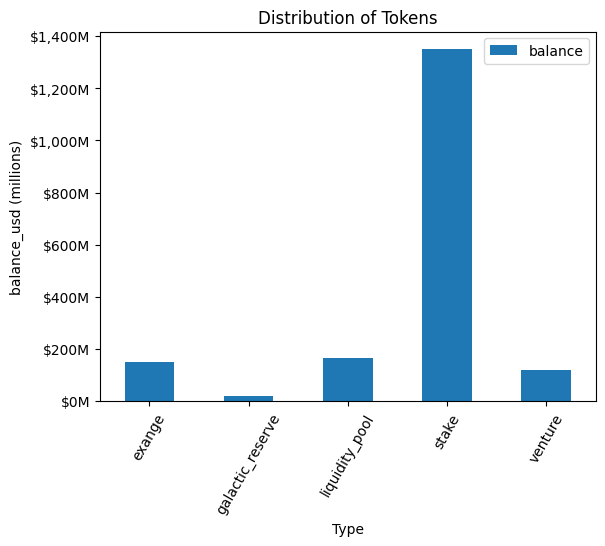

In [122]:
wallets_20_grouped.plot(kind="bar", y='balance')
plt.xlabel("Type")
plt.ylabel("balance_usd (millions)")
plt.xticks(rotation=60)
plt.title("Distribution of Tokens")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
plt.show()


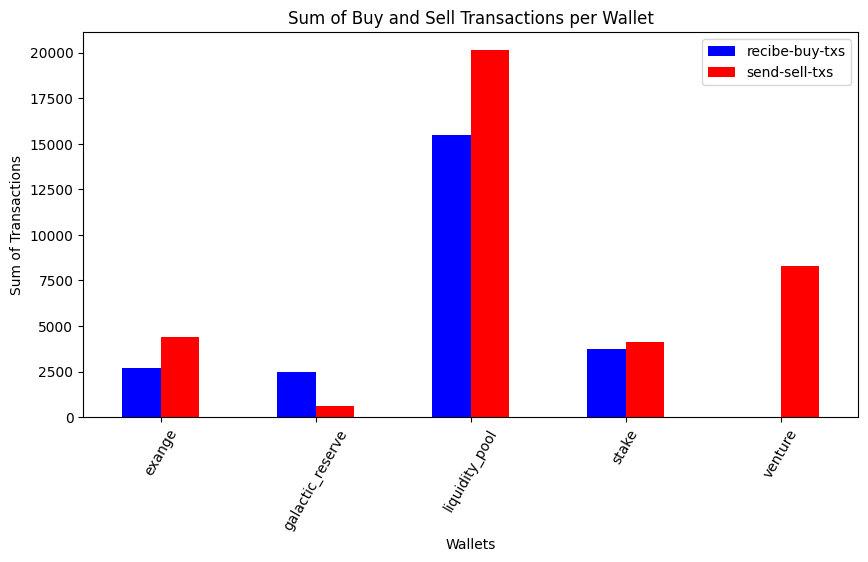

In [123]:
# Get the columns 'buy_tx' and 'sell_tx' as a new DataFrame
df_plot = wallets_20_grouped[['recibe-buy-txs', 'send-sell-txs']]

# Plot the bar chart
ax = df_plot.plot(kind='bar', stacked=False, figsize=(10, 5), color=['blue', 'red'])

# Add labels and title to the plot
ax.set_xlabel('Wallets')
ax.set_ylabel('Sum of Transactions')
ax.set_title('Sum of Buy and Sell Transactions per Wallet')
plt.xticks(rotation=60)

# Show the plot
plt.show()